# Assignment 4


In [7]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.stats import ks_2samp
from scipy.stats import pearsonr
from scipy.stats import spearmanr

%matplotlib inline


#imports downloader

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
# s = json.load( open(os.getenv ('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

os.environ["PUIDATA"] = "%s//PUIDATA"%os.getenv("HOME")
np.random.seed(2000)


In [8]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    # Check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # iIf yes just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA")) 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

# Read in data


In [9]:
ds1 = '201601'
getCitiBikeCSV(ds1)

file in place, you can continue


In [10]:
ds2 = '201605'
getCitiBikeCSV(ds2)

file in place, you can continue


## Downloaded the data for Jan and May 2016

In [72]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + ds1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + ds2 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [73]:
len(df1)

509478

In [74]:
len(df2)

1212280

In [75]:
comb =  [df1, df2]
data = pd.concat(comb)
len(data)

1721758

In [76]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


## Drop records with null values

In [56]:
data = data.dropna()
len(data)

1520892

In [57]:
data['date'] = pd.to_timedelta(data['starttime'].str.split().str[1])#keep only time
data.rename(columns={'date': 'time'}, inplace=True)

In [58]:
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,00:01:12


## Distribution of ridership in day and night

In [60]:
data1 = data[['tripduration', 'time']]
data1.head()

,tripduration,time
0,923,00:00:41
1,379,00:00:45
2,589,00:00:48
3,889,00:01:06
4,1480,00:01:12


###  Defining 2000 and 0600 night and the rest as day

In [64]:
night = pd.to_timedelta(['20:00:00', '06:00:00'])

In [65]:
dataDay1 = data1[data1.time<night[0]]
dataDay2 = data1[data1.time>night[1]]
dataNight1 = data1[data1.time>night[0]]
dataNight2 = data1[data1.time<night[1]]

In [68]:
dataDay = dataDay2[dataDay2.time<night[0]]
dataDay.head()

,tripduration,time
1322,1070,06:00:17
1323,143,06:00:27
1324,205,06:01:27
1325,1555,06:03:47
1326,275,06:05:05


In [80]:
nightd = [dataNight1, dataNight2]
dataNight = pd.concat(nightd)

In [81]:
arr1 = np.array(dataNight['tripduration'])
arr2 = np.array(dataDay['tripduration'])

In [92]:
print(len(arr1))
print(len(arr2))

209612
1311242


Text(0,0.5,'Count')

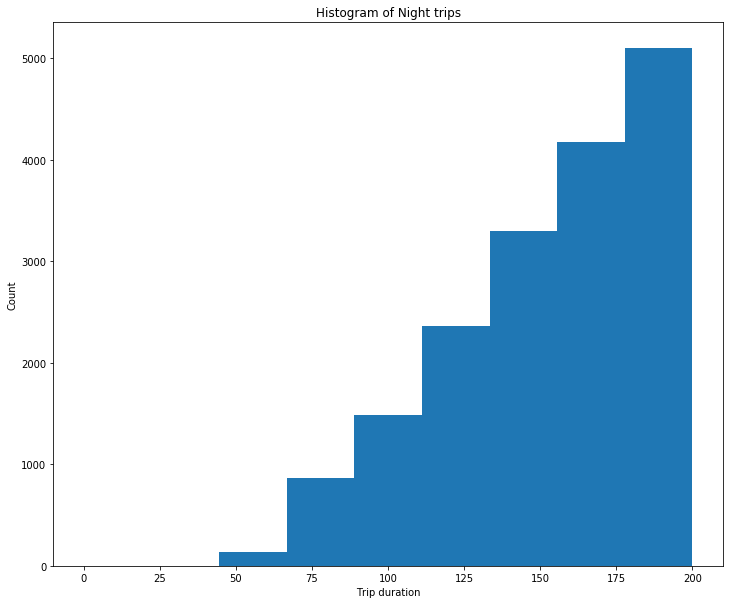

In [118]:
plt.figure(figsize=(12,10))
plt.hist(arr1, bins = np.linspace(0,200,10))
plt.title('Histogram of Night trips')
plt.xlabel('Trip duration')
plt.ylabel('Count')

Text(0,0.5,'Count')

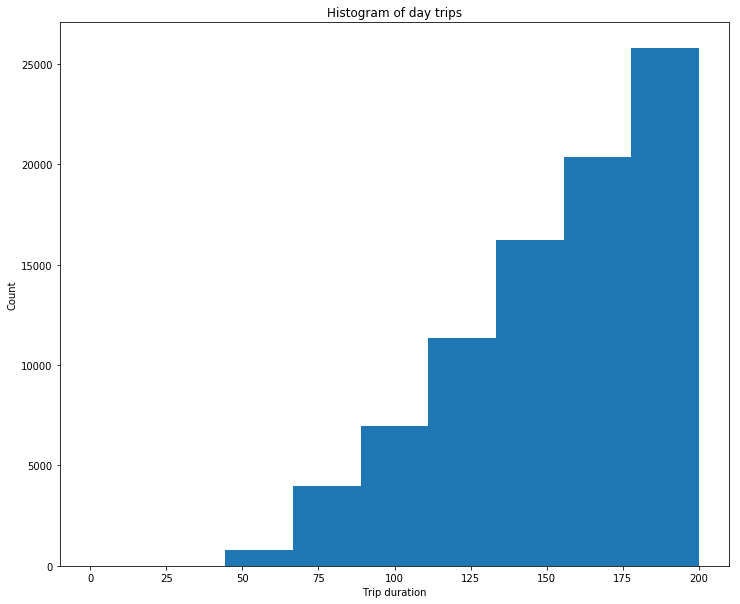

In [89]:
plt.figure(figsize=(12,10))
plt.hist(arr2, bins = np.linspace(0,200,10))
plt.title('Histogram of day trips')
plt.xlabel('Trip duration')
plt.ylabel('Count')

## Null Hypothesis for the day vs night trip distribution

## H0: The distribution for the day is same as the night. (significance = 0.05)

In [93]:
ks = ks_2samp(arr1, arr2)
print(ks)

Ks_2sampResult(statistic=0.0364308528561616, pvalue=7.0320167766111041e-209)


The k-s statistic is 0.036 and p-value is very low and so, we can imply that we can reject the null hypothesis

## Running the K-S test on the sample 200 times smaller

In [103]:
arr1_200 = random.sample(list(arr1), 925)
arr2_200 = random.sample(list(arr2), 9325)

In [104]:
ks1 = ks_2samp(arr1_200, arr2_200)
print(ks1)

Ks_2sampResult(statistic=0.039802912832403448, pvalue=0.13582624715227695)


### The p value has significantly increased and we cannot reject the null hypothesis. This makes sense as the bigger samples have larger datapoints which make it tough to detect whether they are similar or not.

## Running the Pearson test on the original sample

## Null Hypothesis for the day vs night trip distribution

## H0: The distribution for the day is same as the night. (significance = 0.05)

In [108]:
arr3 = random.sample(list(arr2), 209612)

In [109]:
pear = pearsonr(arr1, arr3)
print(pear)

(0.001819170963094138, 0.40491573964421423)


### The coefficient of 0.0018 indicates that there is very little correlation between the two sample values. But the p value here is  0.41 which tells us that there is decent chance of them being the same. So we cannot reject the null hypothesis 

## Spearman test on the original samples

## Null Hypothesis for the day vs night trip distribution

## H0: The distribution for the day is same as the night. (significance = 0.05)

In [114]:
spe = spearmanr(arr1, arr3)
print(spe)

SpearmanrResult(correlation=-0.0027218183552333614, pvalue=0.21271449002753556)


### The coefficient of correlation is 0.0027 and it indicates that there is very little correlation between the two sample values. Now, the p value of 0.2127 tells us that there is not a high chance of the samples being same. But still, it is not low enough to reject the null hypothesis